<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML19_DNN_CNN_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터셋 CNN

아래와 같은 구조로 CNN(합성곱 신경망)을 만드세요.

*   Convolution: 64개 필터, 7x7 크기 커널, ReLU 활성화, same padding
*   Max Pooling: 2x2 필터
*   Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
*   Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
*   Max Pooling: 2x2 필터
*   Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
*   Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
*   Max Pooling: 2x2 필터
*   Flatten
*   완전연결(Dense)층: 128개 뉴런, ReLU 활성화
*   Dropout: 50%
*   완전연결(Dense)층: 64개 뉴런, ReLU 활성화
*   Dropout: 50%
*   출력층

Nadam 옵티마이저와 조기종료 콜백을 사용해서 모델을 훈련하세요.

# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

# load dataset

In [40]:
(x_tr_f, y_tr_f), (x_ts, y_ts) = keras.datasets.mnist.load_data()

In [3]:
x_tr_f.shape, y_tr_f.shape,x_ts.shape, y_ts.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# depth=1인 3차원 형태로 변환 : keras의 합성곱 층은 3차원 입력(height, width, depth)을 기대하기 때문
x_tr_fd3 = x_tr_f.reshape((-1, 28, 28, 1))
x_ts_d3 = x_ts.reshape((-1, 28, 28, 1))

In [5]:
x_tr_fd3.shape, y_tr_f.shape,x_ts_d3.shape, y_ts.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [6]:
np.max(x_tr_fd3), np.min(x_tr_fd3)

(255, 0)

In [7]:
# 값 변환
x_tr_s = x_tr_fd3/np.max(x_tr_fd3)
x_ts_s = x_ts_d3/np.max(x_tr_fd3)

In [8]:
# 세트 분리
x_tr,x_val,y_tr,y_val = train_test_split(x_tr_s,y_tr_f,
                                         stratify = y_tr_f,
                                         test_size = 0.2)

In [9]:
x_tr.shape,y_tr.shape,np.max(x_tr_s), np.min(x_tr_s)

((48000, 28, 28, 1), (48000,), 1.0, 0.0)

In [10]:
np.unique(y_tr,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4738, 5394, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4759]))

# 모델생성

In [11]:
# 모델생성
model = keras.Sequential()

# Convolution: 64개 필터, 7x7 크기 커널, ReLU 활성화, same padding
model.add(keras.layers.Conv2D(filters=64,
                              kernel_size=(7,7),
                              padding='same',
                              activation='relu',
                              input_shape=((28,28,1))))

# Max Pooling: 2x2 필터
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
# Convolution: 128개 필터, 3x3 크기 커널, ReLU 활성화, same padding
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
# Max Pooling: 2x2 필터
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
model.add(keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
# Convolution: 256개 필터, 3x3 크기 커널, ReLU 활성화, same padding
model.add(keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
# Max Pooling: 2x2 필터
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(keras.layers.Flatten())

# 완전연결(Dense)층: 128개 뉴런, ReLU 활성화
model.add(keras.layers.Dense(units=128, activation='relu'))
# Dropout: 50%
model.add(keras.layers.Dropout(rate = 0.5))
# 완전연결(Dense)층: 64개 뉴런, ReLU 활성화
model.add(keras.layers.Dense(units=64, activation='relu'))
# Dropout: 50%
model.add(keras.layers.Dropout(rate = 0.5))

# 출력층
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [12]:
# 컴파일
model.compile(optimizer = 'nadam',loss='sparse_categorical_crossentropy', metrics='accuracy')

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history = model.fit(x_tr,y_tr,epochs=30,
          validation_data = (x_val,y_val),
          callbacks = [early_stop])

Epoch 1/30
1500/1500 [==============================] - 46s 8ms/step - loss: 0.8035 - accuracy: 0.7285 - val_loss: 0.0781 - val_accuracy: 0.9812
Epoch 2/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1145 - accuracy: 0.9731 - val_loss: 0.0709 - val_accuracy: 0.9829
Epoch 3/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0751 - accuracy: 0.9820 - val_loss: 0.0486 - val_accuracy: 0.9892
Epoch 4/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0775 - accuracy: 0.9831 - val_loss: 0.0659 - val_accuracy: 0.9893
Epoch 5/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0642 - accuracy: 0.9859 - val_loss: 0.0505 - val_accuracy: 0.9873
Epoch 6/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0455 - accuracy: 0.9884 - val_loss: 0.0491 - val_accuracy: 0.9910


In [14]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.385819,0.884875,0.078096,0.981167
1,0.113976,0.973583,0.070890,0.982917
2,0.083014,0.980917,0.048619,0.989167
3,0.074222,0.983333,0.065851,0.989333
4,0.062842,0.986562,0.050457,0.987333


In [15]:
hist[hist['val_accuracy']== np.max(hist['val_accuracy'])]

,loss,accuracy,val_loss,val_accuracy
5,0.050133,0.98775,0.049082,0.991


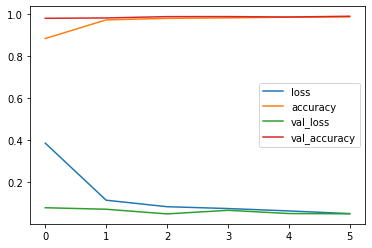

In [16]:
hist.plot()
plt.show()

#  >>>모범해설<<<

## 데이터 전처리

In [55]:
(x_tr_f, y_tr_f), (x_ts, y_ts) = keras.datasets.mnist.load_data()

In [56]:
# 세트 분리
x_tr,x_val,y_tr,y_val = train_test_split(x_tr_f,y_tr_f,
                                         stratify = y_tr_f,
                                         test_size = 0.1,
                                         random_state=42)

In [57]:
x_tr.shape,x_val.shape

((54000, 28, 28), (6000, 28, 28))

In [61]:
# 평균과 표준편차를 이용한 세트 표준화
# x_tr.reshape((-1.28*28))

target_mean = np.mean(x_tr, axis=0, keepdims=True)
target_std = np.std(x_tr, axis=0, keepdims=True) + 1e-8 #(최소값 0 방지)
target_mean.shape, target_std.shape

((1, 28, 28), (1, 28, 28))

In [62]:
np.min(target_std)

1e-08

In [63]:
x_tr_s = (x_tr -target_mean) / target_std
x_val_s = (x_val -target_mean) / target_std
x_ts_s = (x_ts -target_mean) / target_std

In [64]:
# depth=1인 3차원 형태로 변환 : keras의 합성곱 층은 3차원 입력(height, width, depth)을 기대하기 때문
x_tr_ss = x_tr_s.reshape((-1,28,28,1))
x_val_ss = x_val_s.reshape((-1,28,28,1))
x_ts_ss = x_ts_s.reshape((-1,28,28,1))

## CNN

In [65]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

cnn_md = keras.Sequential(layers=[
                            keras.layers.Conv2D(filters=64, kernel_size=(7,7), padding='same', activation='relu', input_shape=(28,28,1)),
                            keras.layers.MaxPool2D(pool_size=(2,2)),
                            keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
                            keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
                            keras.layers.MaxPool2D(pool_size=(2,2)),
                            keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
                            keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
                            keras.layers.MaxPool2D(pool_size=(2,2)),
                            keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dropout(rate=0.5),
                            keras.layers.Dense(units=64, activation='relu'),
                            keras.layers.Dropout(rate=0.5),
                            keras.layers.Dense(units=10, activation='softmax')
])

In [66]:
cnn_md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

* conv2d (Conv2D)              (None, 28, 28, 64)        3200 
    * (7 * 7 +1 ) *64 = 3200
* conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856
    * (3 * 3 +1) *128 = 73856

모델 컴파일, 훈련

In [67]:
cnn_md.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [68]:
early_stop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
check_point_cb = keras.callbacks.ModelCheckpoint('cnn1_model.h5', save_best_only=True)

cnn_history = cnn_md.fit(x_tr_ss,y_tr,epochs=100,
                         callbacks = [early_stop_cb,check_point_cb],
                         validation_data = (x_val_ss,y_val)
                         )

Epoch 1/100
1688/1688 [==============================] - 15s 8ms/step - loss: 0.7895 - accuracy: 0.7441 - val_loss: 10547.9277 - val_accuracy: 0.9755
Epoch 2/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1258 - accuracy: 0.9705 - val_loss: 7538.1265 - val_accuracy: 0.9772
Epoch 3/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1019 - accuracy: 0.9782 - val_loss: 2490.7112 - val_accuracy: 0.9867
Epoch 4/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0769 - accuracy: 0.9829 - val_loss: 215513.6250 - val_accuracy: 0.9838
Epoch 5/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0616 - accuracy: 0.9856 - val_loss: 11638.8770 - val_accuracy: 0.9898
Epoch 6/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0619 - accuracy: 0.9865 - val_loss: 11918.1611 - val_accuracy: 0.9867
Epoch 7/100
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0573 - accuracy: 0.98

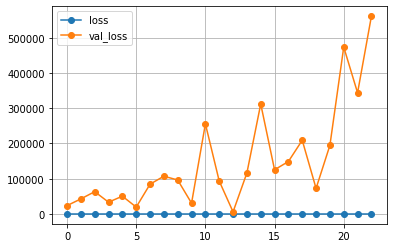

In [51]:
cnn_hist = pd.DataFrame(cnn_history.history)
cnn_hist[['loss','val_loss']].plot(marker='o')
plt.grid()
plt.show()